#                                              Retail Analysis with Walmart Data
# Project 4 

# DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

# Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

# Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

# Analysis Tasks

Basic Statistics tasks

Which store has maximum sales

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.formula.api import ols
import datetime as dt
import warnings

In [2]:
walmart_df=pd.read_csv('Walmart_Store_sales.csv')
warnings.filterwarnings('ignore')

In [3]:
# to display first 5 rows
walmart_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
# to display last 5 rows
walmart_df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [5]:
#info() is used to complete description of data
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
# to get columns names
walmart_df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
# generalising column names by loweringcase
walmart_df.columns=walmart_df.columns.str.lower()
walmart_df.columns

Index(['store', 'date', 'weekly_sales', 'holiday_flag', 'temperature',
       'fuel_price', 'cpi', 'unemployment'],
      dtype='object')

In [8]:
# looking for null values in dataset
walmart_df.isnull().sum()

store           0
date            0
weekly_sales    0
holiday_flag    0
temperature     0
fuel_price      0
cpi             0
unemployment    0
dtype: int64

# Maximum Sales

In [9]:
# groupby stores and get total sales
store_total_weekly_sales=walmart_df.groupby('store')['weekly_sales'].sum()
store_total_weekly_sales.to_frame()

,weekly_sales
store,
1,2.224028e+08
2,2.753824e+08
3,5.758674e+07
4,2.995440e+08
5,4.547569e+07
6,2.237561e+08
7,8.159828e+07
8,1.299512e+08
9,7.778922e+07


In [10]:
print("{:.2f}".format(store_total_weekly_sales.max()))
# using argmax to get the std max std.dev store index
print(store_total_weekly_sales.index[store_total_weekly_sales.argmax()])

301397792.46
20


# Store number :20 has the maximum sales of 301397792.46

# Maximum Sales Standard Deviation

In [11]:
# groupby stores and get std.dev
store_sales_std=walmart_df.groupby('store')['weekly_sales'].std()
store_sales_std.to_frame()

,weekly_sales
store,
1,155980.767761
2,237683.694682
3,46319.631557
4,266201.442297
5,37737.965745
6,212525.855862
7,112585.469220
8,106280.829881
9,69028.666585


In [12]:
print("{:.2f}".format(store_sales_std.max()))
# using argmax to get the max std.dev store index
print(store_sales_std.index[store_sales_std.argmax()])

317569.95
14


# Store number : 14 has the maximum sales standard seviation 317569.95

# Coeffcient of Mean to Standatd Deviation

In [13]:
# groupby stores and get mean values
store_sales_mean=walmart_df.groupby('store')['weekly_sales'].mean()
store_sales_mean.to_frame()

,weekly_sales
store,
1,1.555264e+06
2,1.925751e+06
3,4.027044e+05
4,2.094713e+06
5,3.180118e+05
6,1.564728e+06
7,5.706173e+05
8,9.087495e+05
9,5.439806e+05


In [14]:
# cv=(mean/std.dev)*100
covariance_std_mean=(store_sales_std / store_sales_mean)*100

# Covariance Values (Cv)
    -Cv less than 10= Very Good
    -Cv between 10-20=Good
    -Cv between 21-30=Acceptable
    -Cv greater than 30=Not Acceptable

In [15]:
covariance_std_mean.to_frame()

,weekly_sales
store,
1,10.029212
2,12.342388
3,11.502141
4,12.708254
5,11.866844
6,13.582286
7,19.730469
8,11.695283
9,12.689547


# Store numbers: 30,31,33,37,42,43,44 has very good co-efficients of mean to standard deviation

# Good Quarterly growth rate in year 2010

In [16]:
# Converting date column from object dtype to datetime dtype
walmart_df['date']=walmart_df['date'].apply(lambda x:dt.datetime.strptime(x,"%d-%m-%Y"))

In [17]:
# Using datetimeindex to get year/month/day from dataset
walmart_df['year']=pd.DatetimeIndex(walmart_df['date']).year
walmart_df['month']=pd.DatetimeIndex(walmart_df['date']).month
walmart_df['day']=pd.DatetimeIndex(walmart_df['date']).day

In [18]:
walmart_df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5


In [21]:
# Converting date back to string with our desired format
# walmart_df['date']=walmart_df['date'].apply(lambda x:dt.datetime.strptime(x,"%d-%m-%Y"))

In [22]:
month_dict={1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}
# Converrting month int values to corresponding month names using apply functin and dictionary
walmart_df['month']=walmart_df['month'].apply(lambda x: month_dict[x])

In [23]:
walmart_df.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,5


In [24]:
# grouping data by years
Yearly_walmartdata=walmart_df.groupby('year')
Yearly_walmartdata.ngroups

3

In [25]:
# getting groups of different years(2010,2011,2012)
stores_2012_sales =Yearly_walmartdata.get_group(2012)
stores_2011_sales =Yearly_walmartdata.get_group(2011)
stores_2010_sales =Yearly_walmartdata.get_group(2010)

In [26]:
stores_2012_sales.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
100,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,2012,Jan,6
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,Jan,13
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,Jan,20
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,Jan,27
104,1,2012-02-03,1636339.65,0,56.55,3.360,220.172015,7.348,2012,Feb,3


In [27]:
# adding new column to find and store quartile values
stores_2012_sales['quartile']=0
stores_2012_sales.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,quartile
100,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,2012,Jan,6,0
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,Jan,13,0
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,Jan,20,0
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,Jan,27,0
104,1,2012-02-03,1636339.65,0,56.55,3.360,220.172015,7.348,2012,Feb,3,0


In [28]:
stores_2012_sales['month'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct'], dtype=object)

In [29]:
# using python code to split month into quartiles
for i in stores_2012_sales['month']:
    if i in ['Jan','Feb','Mar']:
        stores_2012_sales['quartile'][stores_2012_sales[stores_2012_sales['month']==i].index]='Q1'
    elif i in ['Apr','May','Jun']:
        stores_2012_sales['quartile'][stores_2012_sales[stores_2012_sales['month']==i].index]='Q2'
    elif i in ['Jul','Aug','Sep']:
        stores_2012_sales['quartile'][stores_2012_sales[stores_2012_sales['month']==i].index]='Q3'
    elif i in ['Oct','Nov','Dec']:
        stores_2012_sales['quartile'][stores_2012_sales[stores_2012_sales['month']==i].index]='Q4'


In [30]:
stores_2012_sales

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,quartile
100,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,2012,Jan,6,Q1
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,Jan,13,Q1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,Jan,20,Q1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,Jan,27,Q1
104,1,2012-02-03,1636339.65,0,56.55,3.360,220.172015,7.348,2012,Feb,3,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,Sep,28,Q3
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,2012,Oct,5,Q4
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,2012,Oct,12,Q4
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,Oct,19,Q4


In [31]:
# grouping data by quartilesabs
stores_2012sales=stores_2012_sales.groupby('quartile')
stores_2012sales.ngroups

4

In [32]:
# get individual quartile groups (Q1,Q2,Q3,Q4)
q1_data =stores_2012sales.get_group('Q1')
q2_data =stores_2012sales.get_group('Q2')
q3_data =stores_2012sales.get_group('Q3')
q4_data =stores_2012sales.get_group('Q4')

In [33]:
# getting total sales of all stores in each quarters
q1_sales =q1_data.groupby('store')['weekly_sales'].sum()
q2_sales =q2_data.groupby('store')['weekly_sales'].sum()
q3_sales =q3_data.groupby('store')['weekly_sales'].sum()
q4_sales =q4_data.groupby('store')['weekly_sales'].sum()

In [34]:
q2_sales.head(3)

store
1    20978760.12
2    25083604.88
3     5620316.49
Name: weekly_sales, dtype: float64

In [35]:
q3_sales.head(3)

store
1    20253947.78
2    24303354.86
3     5298005.47
Name: weekly_sales, dtype: float64

In [36]:
# finding the Q3 growth rate for each store
q3_salesgrowth  =q3_sales-q2_sales
q3_salesgrowth.to_frame()

,weekly_sales
store,
1,-724812.34
2,-780250.02
3,-322311.02
4,-657571.21
5,-302572.70
6,-666597.68
7,971928.12
8,-170678.25
9,-462785.55


In [37]:
# Using argmax to find the store that has maximm sales growth in quarter 3
print(q3_salesgrowth.index[q3_salesgrowth.argmax()])
print('{:.2f}'.format(q3_salesgrowth.max()))

7
971928.12


# Store number : 7 has good quarterly 3 sales growth than other stores

# Holiday and Non-Holiday Sales
         1. Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
         2. Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
         3. Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
         4. Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [38]:
# finding mean sales on superbowl for all stores each year
superbowl_sales=walmart_df[(walmart_df['date']=='12-Feb-10')+(walmart_df['date']=='11-Feb-11')+(walmart_df['date']=='10-Feb-12')+(walmart_df['date']=='8-Feb-13')]
print('{:.2f}'.format(superbowl_sales['weekly_sales'].mean()))

1079127.99


In [39]:
# finding mean sales on Labour Day for all stores each year
Labourday_sales=walmart_df[(walmart_df['date']=='10-Sep-10')+(walmart_df['date']=='09-Sep-11')+(walmart_df['date']=='07-Sep-12')+(walmart_df['date']=='06-Sep-13')]
print('{:.2f}'.format(Labourday_sales['weekly_sales'].mean()))

1042427.29


In [40]:
# finding mean sales on Thanksgiving for all stores each year
Thanksgiving_sales=walmart_df[(walmart_df['date']=='26-Nov-10')+(walmart_df['date']=='25-Nov-11')+(walmart_df['date']=='23-Nov-12')+(walmart_df['date']=='29-Nov-13')]
print('{:.2f}'.format(Thanksgiving_sales['weekly_sales'].mean()))

1471273.43


In [41]:
# finding mean sales on Thanksgiving for all stores each year
Christmas_sales=walmart_df[(walmart_df['date']=='31-Dec-10')+(walmart_df['date']=='30-Dec-11')+(walmart_df['date']=='28-Dec-12')+(walmart_df['date']=='27-Dec-13')]
print('{:.2f}'.format(Christmas_sales['weekly_sales'].mean()))

960833.11


# Thanks giving Holiday have mean sales than any other Holiday sales

# Holiday and Non-Holiday data

In [42]:
# grouping dataset by holidayflag
holidaysdf=walmart_df.groupby('holiday_flag')

In [43]:
# getting only hoilday data
holiday_sales=holidaysdf.get_group(1)
print("{:.2f}".format(holiday_sales['weekly_sales'].mean()))

1122887.89


In [44]:
# getting only hoilday data
nonholiday_sales=holidaysdf.get_group(0)
print("{:.2f}".format(nonholiday_sales['weekly_sales'].mean()))

1041256.38


### Holiday have higher sales mean than non-holiday sales mean

In [45]:
# Each holiday vs Non-holiday mean sales

In [46]:
print("{:.2f}".format(superbowl_sales['weekly_sales'].mean()))
print("{:.2f}".format(Labourday_sales['weekly_sales'].mean()))
print("{:.2f}".format(Thanksgiving_sales['weekly_sales'].mean()))
print("{:.2f}".format(Christmas_sales['weekly_sales'].mean()))

1079127.99
1042427.29
1471273.43
960833.11


In [47]:
print("{:.2f}".format(nonholiday_sales['weekly_sales'].mean()))

1041256.38


# Christmas holiday sales has a negative impact on sales than other holiday when compared to Non- holiday sales mean

# Monthly and Semester view of Sales(Year-wise)

In [48]:
# grouping by month for all years
totalmonthly_sales=walmart_df.groupby('month')
totalmonthly_sales.ngroups

12

In [49]:
totalmonthly_sales['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,630.0,1.026762e+06,543864.624192,232769.09,534583.5075,948789.575,1402726.700,2565259.92
Aug,585.0,1.048017e+06,542653.059046,224031.19,575997.7800,969387.480,1442819.280,2283540.30
Dec,450.0,1.281864e+06,774037.720767,209986.25,616295.8450,1154880.920,1714442.515,3818686.45
Feb,540.0,1.053200e+06,564207.057354,234218.03,554628.6350,980765.180,1431376.635,2623469.95
Jan,360.0,9.238846e+05,472616.460339,231155.90,521051.0125,830944.935,1256202.130,2047766.07
Jul,630.0,1.031748e+06,531141.778886,224806.96,577830.8550,953770.830,1396269.865,2358055.30
Jun,585.0,1.064325e+06,548683.953608,238172.66,581745.7200,984336.040,1442092.080,2363601.47
Mar,585.0,1.013309e+06,529805.743801,238084.08,544408.1400,943951.670,1365824.970,2237544.75
May,540.0,1.031714e+06,536589.412470,239206.26,543588.2225,969562.080,1388603.735,2370116.52


In [50]:
# grouping by month for year 2010
monthlysales_2010=stores_2010_sales.groupby('month')
monthlysales_2010['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,225.0,1.028499e+06,545424.247706,257361.30,527019.7800,969594.470,1.391256e+06,2495630.51
Aug,180.0,1.042445e+06,539322.149800,224031.19,573235.4675,981237.730,1.418366e+06,2219813.50
Dec,225.0,1.283380e+06,793498.247838,209986.25,599730.0700,1149612.040,1.707298e+06,3818686.45
Feb,180.0,1.057405e+06,571029.268079,267956.30,534468.2225,997074.975,1.470286e+06,2623469.95
Jul,225.0,1.033689e+06,534340.296029,242047.03,570231.2100,959229.090,1.371987e+06,2334788.42
Jun,180.0,1.068034e+06,556849.016817,259419.91,551924.8925,1002244.665,1.423940e+06,2363601.47
Mar,180.0,1.010666e+06,531192.529079,262893.76,519202.3825,964763.590,1.340757e+06,2237544.75
May,180.0,1.037283e+06,542985.021379,267065.35,530713.0675,973124.460,1.368593e+06,2370116.52
Nov,180.0,1.126963e+06,642755.592239,224639.76,558963.6550,995672.600,1.508792e+06,2939946.38


In [51]:
semester1_2010=stores_2010_sales[stores_2010_sales['month'].isin(['Jan','Feb','Mar','Apr','May','Jun'])]
semester1_2010.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,5


In [52]:
semester2_2010=stores_2010_sales[stores_2010_sales['month'].isin(['Jul','Aug','Sep','Oct','Nov','Dec'])]
semester2_2010.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
21,1,2010-07-02,1492418.14,0,80.91,2.669,211.223533,7.787,2010,Jul,2
22,1,2010-07-09,1546074.18,0,80.48,2.642,211.108414,7.787,2010,Jul,9
23,1,2010-07-16,1448938.92,0,83.15,2.623,211.100385,7.787,2010,Jul,16
24,1,2010-07-23,1385065.20,0,83.36,2.608,211.235144,7.787,2010,Jul,23
25,1,2010-07-30,1371986.60,0,81.84,2.640,211.369903,7.787,2010,Jul,30


In [53]:
# grouping by month for year 2011
monthlysales_2011=stores_2011_sales.groupby('month')
monthlysales_2011['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,225.0,1.006784e+06,532258.833292,232769.09,534578.7800,937473.130,1.372485e+06,2313861.81
Aug,180.0,1.047774e+06,549887.085283,237095.82,570423.6150,955710.315,1.445838e+06,2273470.62
Dec,225.0,1.280347e+06,755843.504954,215359.21,630327.2800,1158708.980,1.781529e+06,3676388.98
Feb,180.0,1.035174e+06,552442.387986,234218.03,556183.5800,961012.950,1.420064e+06,2351143.07
Jan,180.0,9.094665e+05,466122.257495,231155.90,513597.3125,812167.545,1.215770e+06,1886393.94
Jul,225.0,1.021828e+06,526841.700020,224806.96,582381.9500,936001.980,1.396927e+06,2123787.79
Jun,180.0,1.054297e+06,543819.984741,238172.66,585639.7750,974263.155,1.441112e+06,2182246.69
Mar,180.0,9.964247e+05,522341.244321,238084.08,536784.3775,929977.755,1.352847e+06,2143424.61
May,180.0,1.009156e+06,523438.331445,239206.26,543719.8250,943238.085,1.371667e+06,2095599.93


In [54]:
semester1_2011=stores_2011_sales[stores_2011_sales['month'].isin(['Jan','Feb','Mar','Apr','May','Jun'])]
semester1_2011.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
48,1,2011-01-07,1444732.28,0,48.27,2.976,211.404742,7.742,2011,Jan,7
49,1,2011-01-14,1391013.96,0,35.40,2.983,211.457411,7.742,2011,Jan,14
50,1,2011-01-21,1327405.42,0,44.04,3.016,211.827234,7.742,2011,Jan,21
51,1,2011-01-28,1316899.31,0,43.83,3.010,212.197058,7.742,2011,Jan,28
52,1,2011-02-04,1606629.58,0,42.27,2.989,212.566881,7.742,2011,Feb,4


In [55]:
semester2_2011=stores_2011_sales[stores_2011_sales['month'].isin(['Jul','Aug','Sep','Oct','Nov','Dec'])]
semester2_2011.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day
73,1,2011-07-01,1488538.09,0,85.55,3.524,215.184137,7.962,2011,Jul,1
74,1,2011-07-08,1534849.64,0,85.83,3.480,215.277175,7.962,2011,Jul,8
75,1,2011-07-15,1455119.97,0,88.54,3.575,215.361109,7.962,2011,Jul,15
76,1,2011-07-22,1396926.82,0,85.77,3.651,215.422278,7.962,2011,Jul,22
77,1,2011-07-29,1352219.79,0,86.83,3.682,215.483448,7.962,2011,Jul,29


In [56]:
# grouping by month for year 2012
monthlysales_2012=stores_2012_sales.groupby('month')
monthlysales_2012['weekly_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
Apr,180.0,1.049561e+06,558183.253234,249798.75,548516.0000,950743.050,1.456415e+06,2565259.92
Aug,225.0,1.052670e+06,541866.268723,237129.81,576620.3100,976137.730,1.497055e+06,2283540.30
Feb,180.0,1.067020e+06,571613.468771,242526.70,564122.8100,970644.815,1.448538e+06,2462978.28
Jan,180.0,9.383026e+05,479887.956347,236920.49,540523.1525,855680.105,1.269834e+06,2047766.07
Jul,180.0,1.041719e+06,535223.017499,249134.32,577204.6500,960529.395,1.456741e+06,2358055.30
Jun,225.0,1.069379e+06,548322.510590,244338.31,583648.5900,988764.840,1.451782e+06,2245257.18
Mar,225.0,1.028932e+06,536489.204740,246970.97,557547.2500,952264.910,1.427881e+06,2214967.44
May,180.0,1.048703e+06,545296.384619,261851.74,549055.7525,988833.255,1.428744e+06,2207214.81
Oct,180.0,1.024232e+06,526815.738642,253731.13,548829.2100,962230.855,1.413769e+06,2246411.89


In [57]:
semester1_2012=stores_2012_sales[stores_2012_sales['month'].isin(['Jan','Feb','Mar','Apr','May','Jun'])]
semester1_2012.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,quartile
100,1,2012-01-06,1550369.92,0,49.01,3.157,219.714258,7.348,2012,Jan,6,Q1
101,1,2012-01-13,1459601.17,0,48.53,3.261,219.892526,7.348,2012,Jan,13,Q1
102,1,2012-01-20,1394393.84,0,54.11,3.268,219.985689,7.348,2012,Jan,20,Q1
103,1,2012-01-27,1319325.59,0,54.26,3.290,220.078852,7.348,2012,Jan,27,Q1
104,1,2012-02-03,1636339.65,0,56.55,3.360,220.172015,7.348,2012,Feb,3,Q1


In [58]:
semester2_2012=stores_2012_sales[stores_2012_sales['month'].isin(['Jul','Aug','Sep','Oct','Nov','Dec'])]
semester2_2012.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,quartile
126,1,2012-07-06,1769854.16,0,81.57,3.227,221.883779,6.908,2012,Jul,6,Q3
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908,2012,Jul,13,Q3
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908,2012,Jul,20,Q3
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908,2012,Jul,27,Q3
130,1,2012-08-03,1631135.79,0,86.11,3.417,221.949864,6.908,2012,Aug,3,Q3


# Visualization

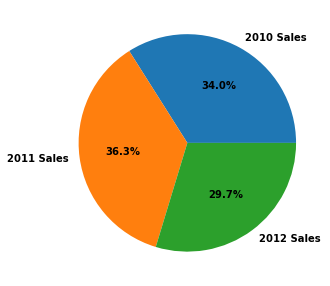

In [59]:
# Visualization total sales percentage for each year
list1=[stores_2010_sales['weekly_sales'].sum(),stores_2011_sales['weekly_sales'].sum(),stores_2012_sales['weekly_sales'].sum()]
labels='2010 Sales','2011 Sales','2012 Sales'
# cmap=plt.get_cmap('YlGnBu')
# colors=cmap(np.arange(3)*95)
txt={'weight':'bold'}
plt.figure(figsize=(15,5))
plt.pie(list1,labels=labels,autopct='%.1f%%',textprops=txt)
plt.show()

### The sales was maximum in the year 2011

In [60]:
# Visualizing total sales percentage semester wise for defferent years
list1=[semester1_2010['weekly_sales'].sum(),semester2_2010['weekly_sales'].sum(),
      semester1_2011['weekly_sales'].sum(),semester2_2011['weekly_sales'].sum(),
      semester1_2012['weekly_sales'].sum(),semester2_2012['weekly_sales'].sum()]

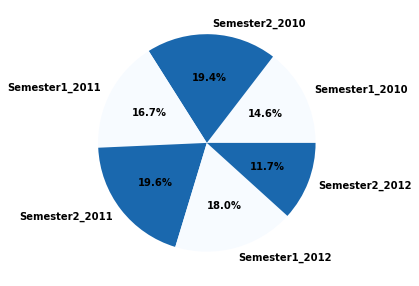

In [61]:
labels='Semester1_2010','Semester2_2010','Semester1_2011','Semester2_2011','Semester1_2012','Semester2_2012'
cmap=plt.get_cmap('Blues')
colors=cmap(np.arange(2)*200)
txt={'weight':'bold'}
plt.figure(figsize=(15,5))
plt.pie(list1,labels=labels,autopct='%.1f%%',colors=colors,textprops=txt)
plt.show()

### The sale was maximum in the 2nd semester of the year 2011

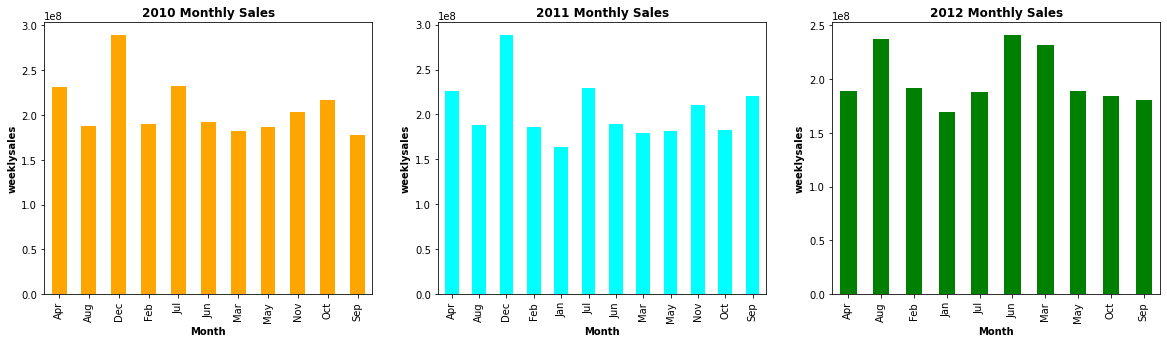

In [62]:
# Visualization Monthly sales for each year
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=.25)
txt={'weight':'bold'}
plt.subplot(1,3,1)
plt.title('2010 Monthly Sales',fontdict=txt)
monthlysales_2010['weekly_sales'].sum().plot.bar(color='orange')
plt.xlabel('Month',fontdict=txt)
plt.ylabel('weeklysales',fontdict=txt)
plt.subplot(1,3,2)
plt.title('2011 Monthly Sales',fontdict=txt)
monthlysales_2011['weekly_sales'].sum().plot.bar(color='cyan')
plt.xlabel('Month',fontdict=txt)
plt.ylabel('weeklysales',fontdict=txt)
plt.subplot(1,3,3)
plt.title('2012 Monthly Sales',fontdict=txt)
monthlysales_2012['weekly_sales'].sum().plot.bar(color='green')
plt.xlabel('Month',fontdict=txt)
plt.ylabel('weeklysales',fontdict=txt)
plt.show()

### There Bar-graphs show monthly sales for each year

In [63]:
# Visualizing semester-wise sales percentage for each years
list1=[semester1_2010['weekly_sales'].sum(),semester2_2010['weekly_sales'].sum()]
list2=[semester1_2011['weekly_sales'].sum(),semester2_2011['weekly_sales'].sum()]
list3=[semester1_2012['weekly_sales'].sum(),semester2_2012['weekly_sales'].sum()]

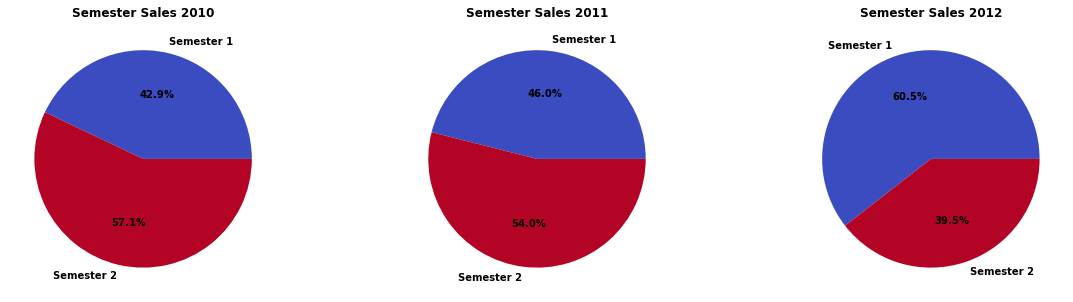

In [64]:
label='Semester 1','Semester 2'
cmap=plt.get_cmap('coolwarm')
colors=cmap(np.arange(2)*1010)
txt={'weight':'bold'}
plt.figure(figsize=(20,5))
plt.subplots_adjust(hspace=.25)

plt.subplot(1,3,1)
plt.title("Semester Sales 2010",fontdict=txt)
plt.pie(list1,labels=label,autopct='%.1f%%',colors=colors,textprops=txt)

plt.subplot(1,3,2)
plt.title("Semester Sales 2011",fontdict=txt)
plt.pie(list2,labels=label,autopct='%.1f%%',colors=colors,textprops=txt)

plt.subplot(1,3,3)
plt.title("Semester Sales 2012",fontdict=txt)
plt.pie(list3,labels=label,autopct='%.1f%%',colors=colors,textprops=txt)
plt.show()

### There Pie-charts show semester wise sales percentage for each year

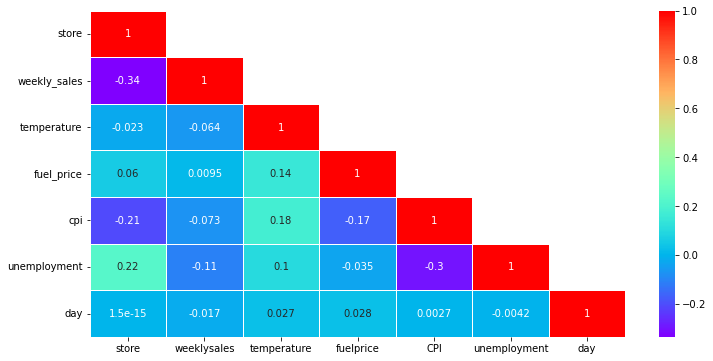

In [65]:
# Heat Map
m=np.ones_like(walmart_df.drop(columns=['holiday_flag','year']).corr())
m[np.tril_indices_from(m)]=0
labels=['store','weeklysales','temperature','fuelprice','CPI','unemployment','day']
plt.figure(figsize=(12,6))
sns.heatmap(walmart_df.drop(columns=['holiday_flag','year']).corr(),annot=True,mask=m,cmap='rainbow',linewidths=.5,xticklabels=labels)
plt.show()

### CPI, Unemployment and fule price does not have any significant import on

# Statistical Model

#### For Store 1- Build prediction models to forecast demand

In [66]:
# getting data for store 1
store_data=walmart_df.groupby('store')
store1_dataset=store_data.get_group(1)
store1_dataset['strdate']=pd.to_datetime(store1_dataset['date'])
store1_dataset['month']=store1_dataset['strdate'].dt.month
store1_dataset.head()


,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,strdate
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2010-02-05
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,2010-02-12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02-19
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02-26
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,2010-03-05


### Restructuring dates as 1 for 5th Feb 2010 and so on 

In [67]:
# Restructuring dates to number to use them in model as categoricl data cannot be used in liner model 1.
dummy =[]
for i in range (1,144):
    dummy.append(i)
store1_dataset['dummy_date']=dummy

In [68]:
store1_dataset.head()

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,strdate,dummy_date
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2,5,2010-02-05,1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2,12,2010-02-12,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,2010-02-19,3
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,2010-02-26,4
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3,5,2010-03-05,5


### LinearRegression Model

In [69]:
model_dataset=store1_dataset[['store','holiday_flag','temperature','fuel_price','cpi','unemployment',
                             'year','month','day','dummy_date','weekly_sales']]
model_dataset.head()

,store,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,dummy_date,weekly_sales
0,1,0,42.31,2.572,211.096358,8.106,2010,2,5,1,1643690.90
1,1,1,38.51,2.548,211.242170,8.106,2010,2,12,2,1641957.44
2,1,0,39.93,2.514,211.289143,8.106,2010,2,19,3,1611968.17
3,1,0,46.63,2.561,211.319643,8.106,2010,2,26,4,1409727.59
4,1,0,46.50,2.625,211.350143,8.106,2010,3,5,5,1554806.68


In [70]:
# Splitting date into train and test for the linear model
train,test=train_test_split(model_dataset,test_size=0.20,random_state=0)
lr=LinearRegression()
x_train= train.drop(columns=['weekly_sales'])
x_test= test.drop(columns=['weekly_sales'])
y_train= train['weekly_sales']
y_test= test['weekly_sales']

In [71]:
# Fitting the model
lr.fit(x_train,y_train)

LinearRegression()

In [72]:
lr.intercept_

-2364627031.702815

In [73]:
# Predicting the weekly_sales using the test data
y_pred=lr.predict(x_test)
y_pred.shape, y_test.shape

((29,), (29,))

In [74]:
# Finding R2 score
print("Test Score={:.2f}".format(lr.score(x_train,y_train)))

Test Score=0.24


### Using Ordinary Least Square Method

In [75]:
# Performing Ordinary Least Square method
fts='+'.join(train.drop(columns=['weekly_sales']).columns)
linearmodel=ols('weekly_sales ~'+fts,data=train).fit()
linearmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           weekly_sales   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     3.585
Date:                Sat, 25 Dec 2021   Prob (F-statistic):           0.000644
Time:                        12:56:18   Log-Likelihood:                -1506.8
No. Observations:                 114   AIC:                             3034.
Df Residuals:                     104   BIC:                             3061.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -1.182e+09   1.02e+10     -0.116      0.908   -2.14e+10     1.9e+10
store        -1.182e+09   1.02e+10     -0.116      0.908   -2.14e+10     1.9e+10
holiday_flag  5.748e+04   5.19e+04      1.107      0.271   -4.55e+04     1.6e+05
temperature  -2791.4208   1171.719     -2.382      0.019   -5114.984    -467.857
fuel_price    4.154e+04   7.15e+04      0.581      0.562      -1e+05    1.83e+05
cpi           2.514e+04   1.46e+04      1.717      0.089   -3892.399    5.42e+04
unemployment  1.591e+04   6.82e+04      0.233      0.816   -1.19e+05    1.51e+05
year          1.174e+06   1.01e+07      0.116      0.908   -1.89e+07    2.13e+07
month         1.114e+05   8.44e+05      0.132      0.895   -1.56e+06    1.78e+06
day          -1522.8776   2.77e+04     -0.055      0.956   -5.65e+04    5.34e+04
dummy_date   -2.452e+04   1.94e+05     -0.127      0.900   -4.09e+05     3.6e+05
==============================================================================
Omnibus:                      107.827   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1379.530
Skew:                           3.169   Prob(JB):                    2.75e-300
Kurtosis:                      18.819   Cond. No.                     1.50e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.07e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

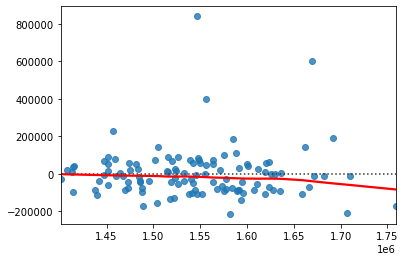

In [76]:
# Residual plot
fitted=linearmodel.fittedvalues
residuals=linearmodel.resid
sns.residplot(fitted,residuals,lowess=True,line_kws={'color':'red'})
plt.show()

## CPI, Unemployment index and Fual price vs Weekly Sales

<Figure size 432x216 with 0 Axes>

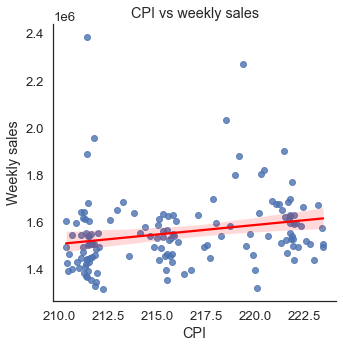

In [77]:
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style='white')
sns.lmplot(x='cpi',y='weekly_sales',data=store1_dataset,line_kws={'color':'red'})
plt.title('CPI vs weekly sales')
plt.xlabel('CPI')
plt.ylabel('Weekly sales')
plt.show()

<Figure size 1152x720 with 0 Axes>

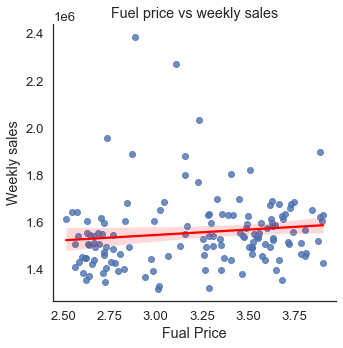

In [78]:
# Visualizing weekly sales and fuel price using a line plot
plt.figure(figsize=(16,10))
sns.set(font_scale=1.2,style='white')
sns.lmplot(x='fuel_price',y='weekly_sales',data=store1_dataset,line_kws={'color':'red'})
plt.title('Fuel price vs weekly sales')
plt.xlabel('Fual Price')
plt.ylabel('Weekly sales')
plt.show()

<Figure size 432x216 with 0 Axes>

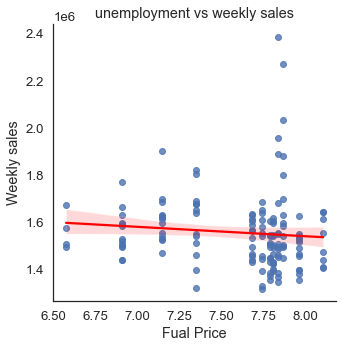

In [79]:
# Visualizing weekly sales and unemployment index usinga line plot
plt.figure(figsize=(6,3))
sns.set(font_scale=1.2,style='white')
sns.lmplot(x='unemployment',y='weekly_sales',data=store1_dataset,line_kws={'color':'red'})
plt.title('unemployment vs weekly sales')
plt.xlabel('Fual Price')
plt.ylabel('Weekly sales')
plt.show()

## Changing date to day of the week

In [80]:
# Converting string object to datetime object
walmart_df['date']=pd.to_datetime(walmart_df['date'])

In [81]:
# Converting string object to datetime object
walmart_df['dayofweek']=walmart_df['date'].dt.day_name()

In [82]:
walmart_df.head(10)

,store,date,weekly_sales,holiday_flag,temperature,fuel_price,cpi,unemployment,year,month,day,dayofweek
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,Feb,5,Friday
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,Feb,12,Friday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,Feb,19,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,Feb,26,Friday
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,Mar,5,Friday
5,1,2010-03-12,1439541.59,0,57.79,2.667,211.380643,8.106,2010,Mar,12,Friday
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,2010,Mar,19,Friday
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,2010,Mar,26,Friday
8,1,2010-04-02,1594968.28,0,62.27,2.719,210.820450,7.808,2010,Apr,2,Friday
9,1,2010-04-09,1545418.53,0,65.86,2.770,210.622857,7.808,2010,Apr,9,Friday
